**Importando arquivo .CSV para o Grafo**

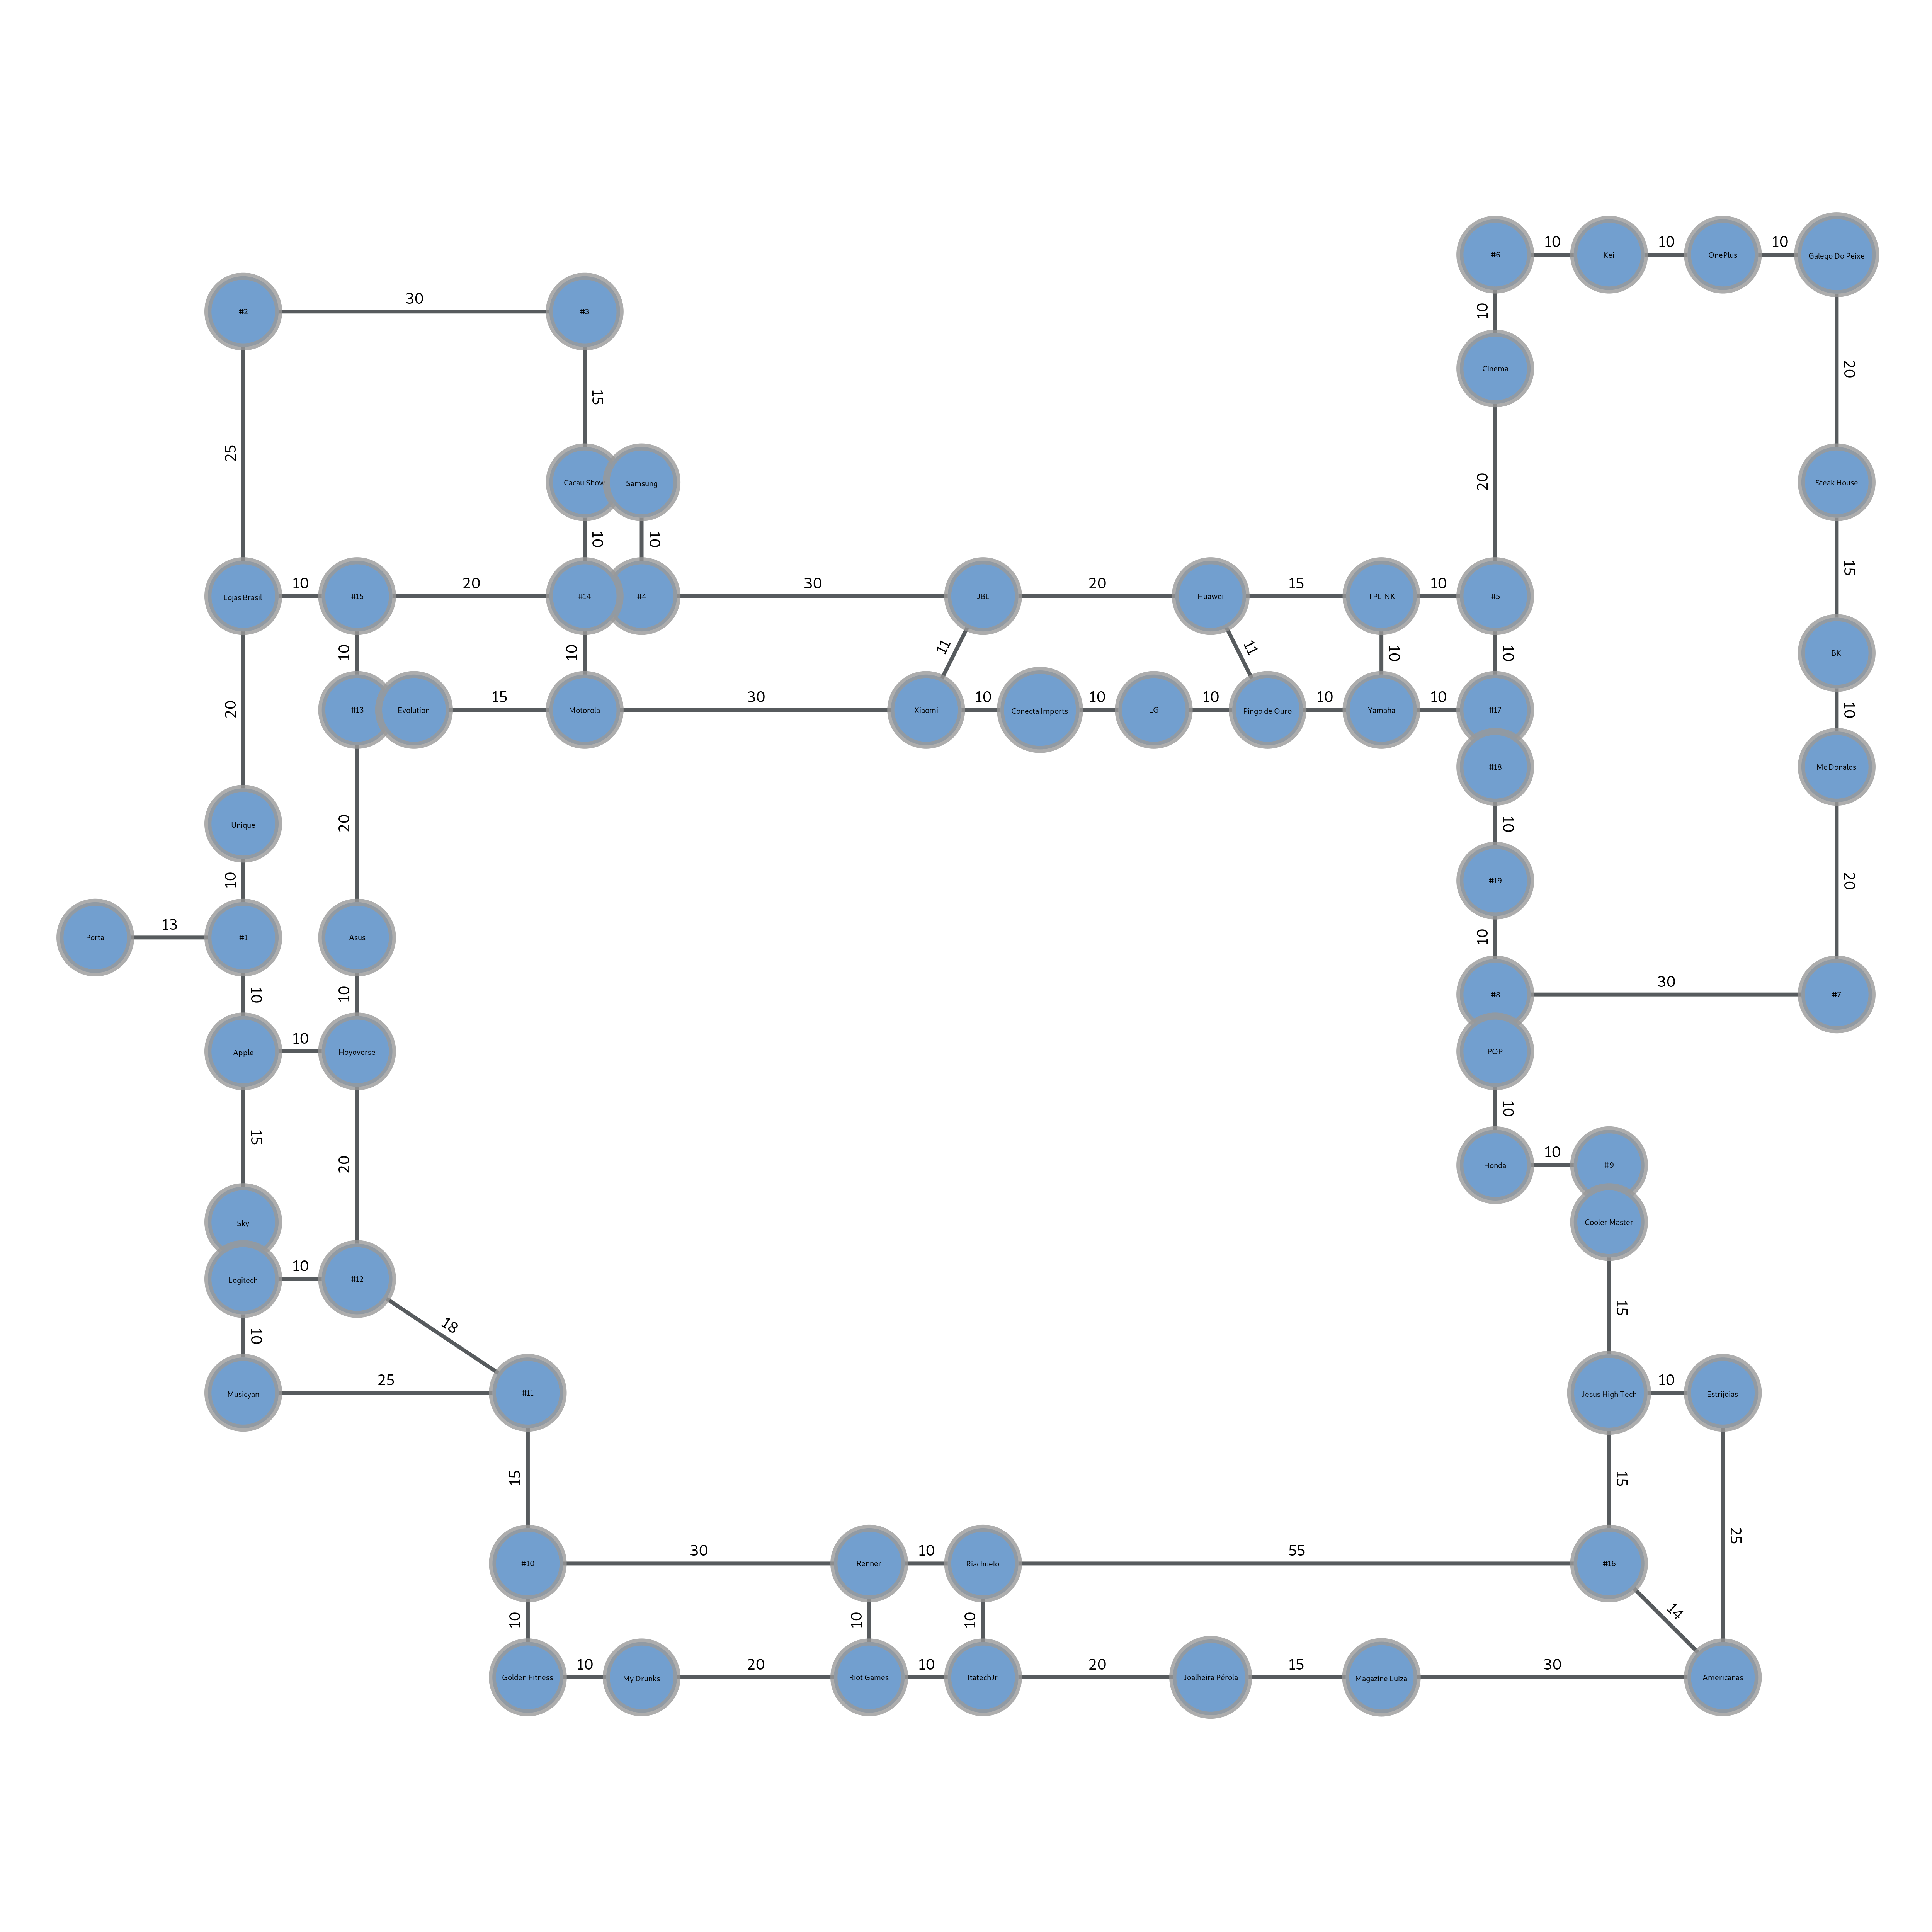

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fbeac8395f8, at 0x7fbeac545588>

In [43]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv

g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()

#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    e_distance[e] = str(edge[3])
    
f_network.close()

#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])

#Desenhando o grafo
gt.graph_draw(g, pos=v_pos, #pos=gt.arf_layout(visual_G),
               vertex_text= v_name,
               edge_text = e_distance,
               edge_pen_width = 10,              
               vertex_font_size=20,
               edge_font_size = 40,
               vertex_shape="circle",
               vertex_fill_color="#729fcf",
               output_size=(5000, 5000))
               #output="two-nodes.png")
            

**Busca em Largura - Ordem de Expansão dos Nodos**

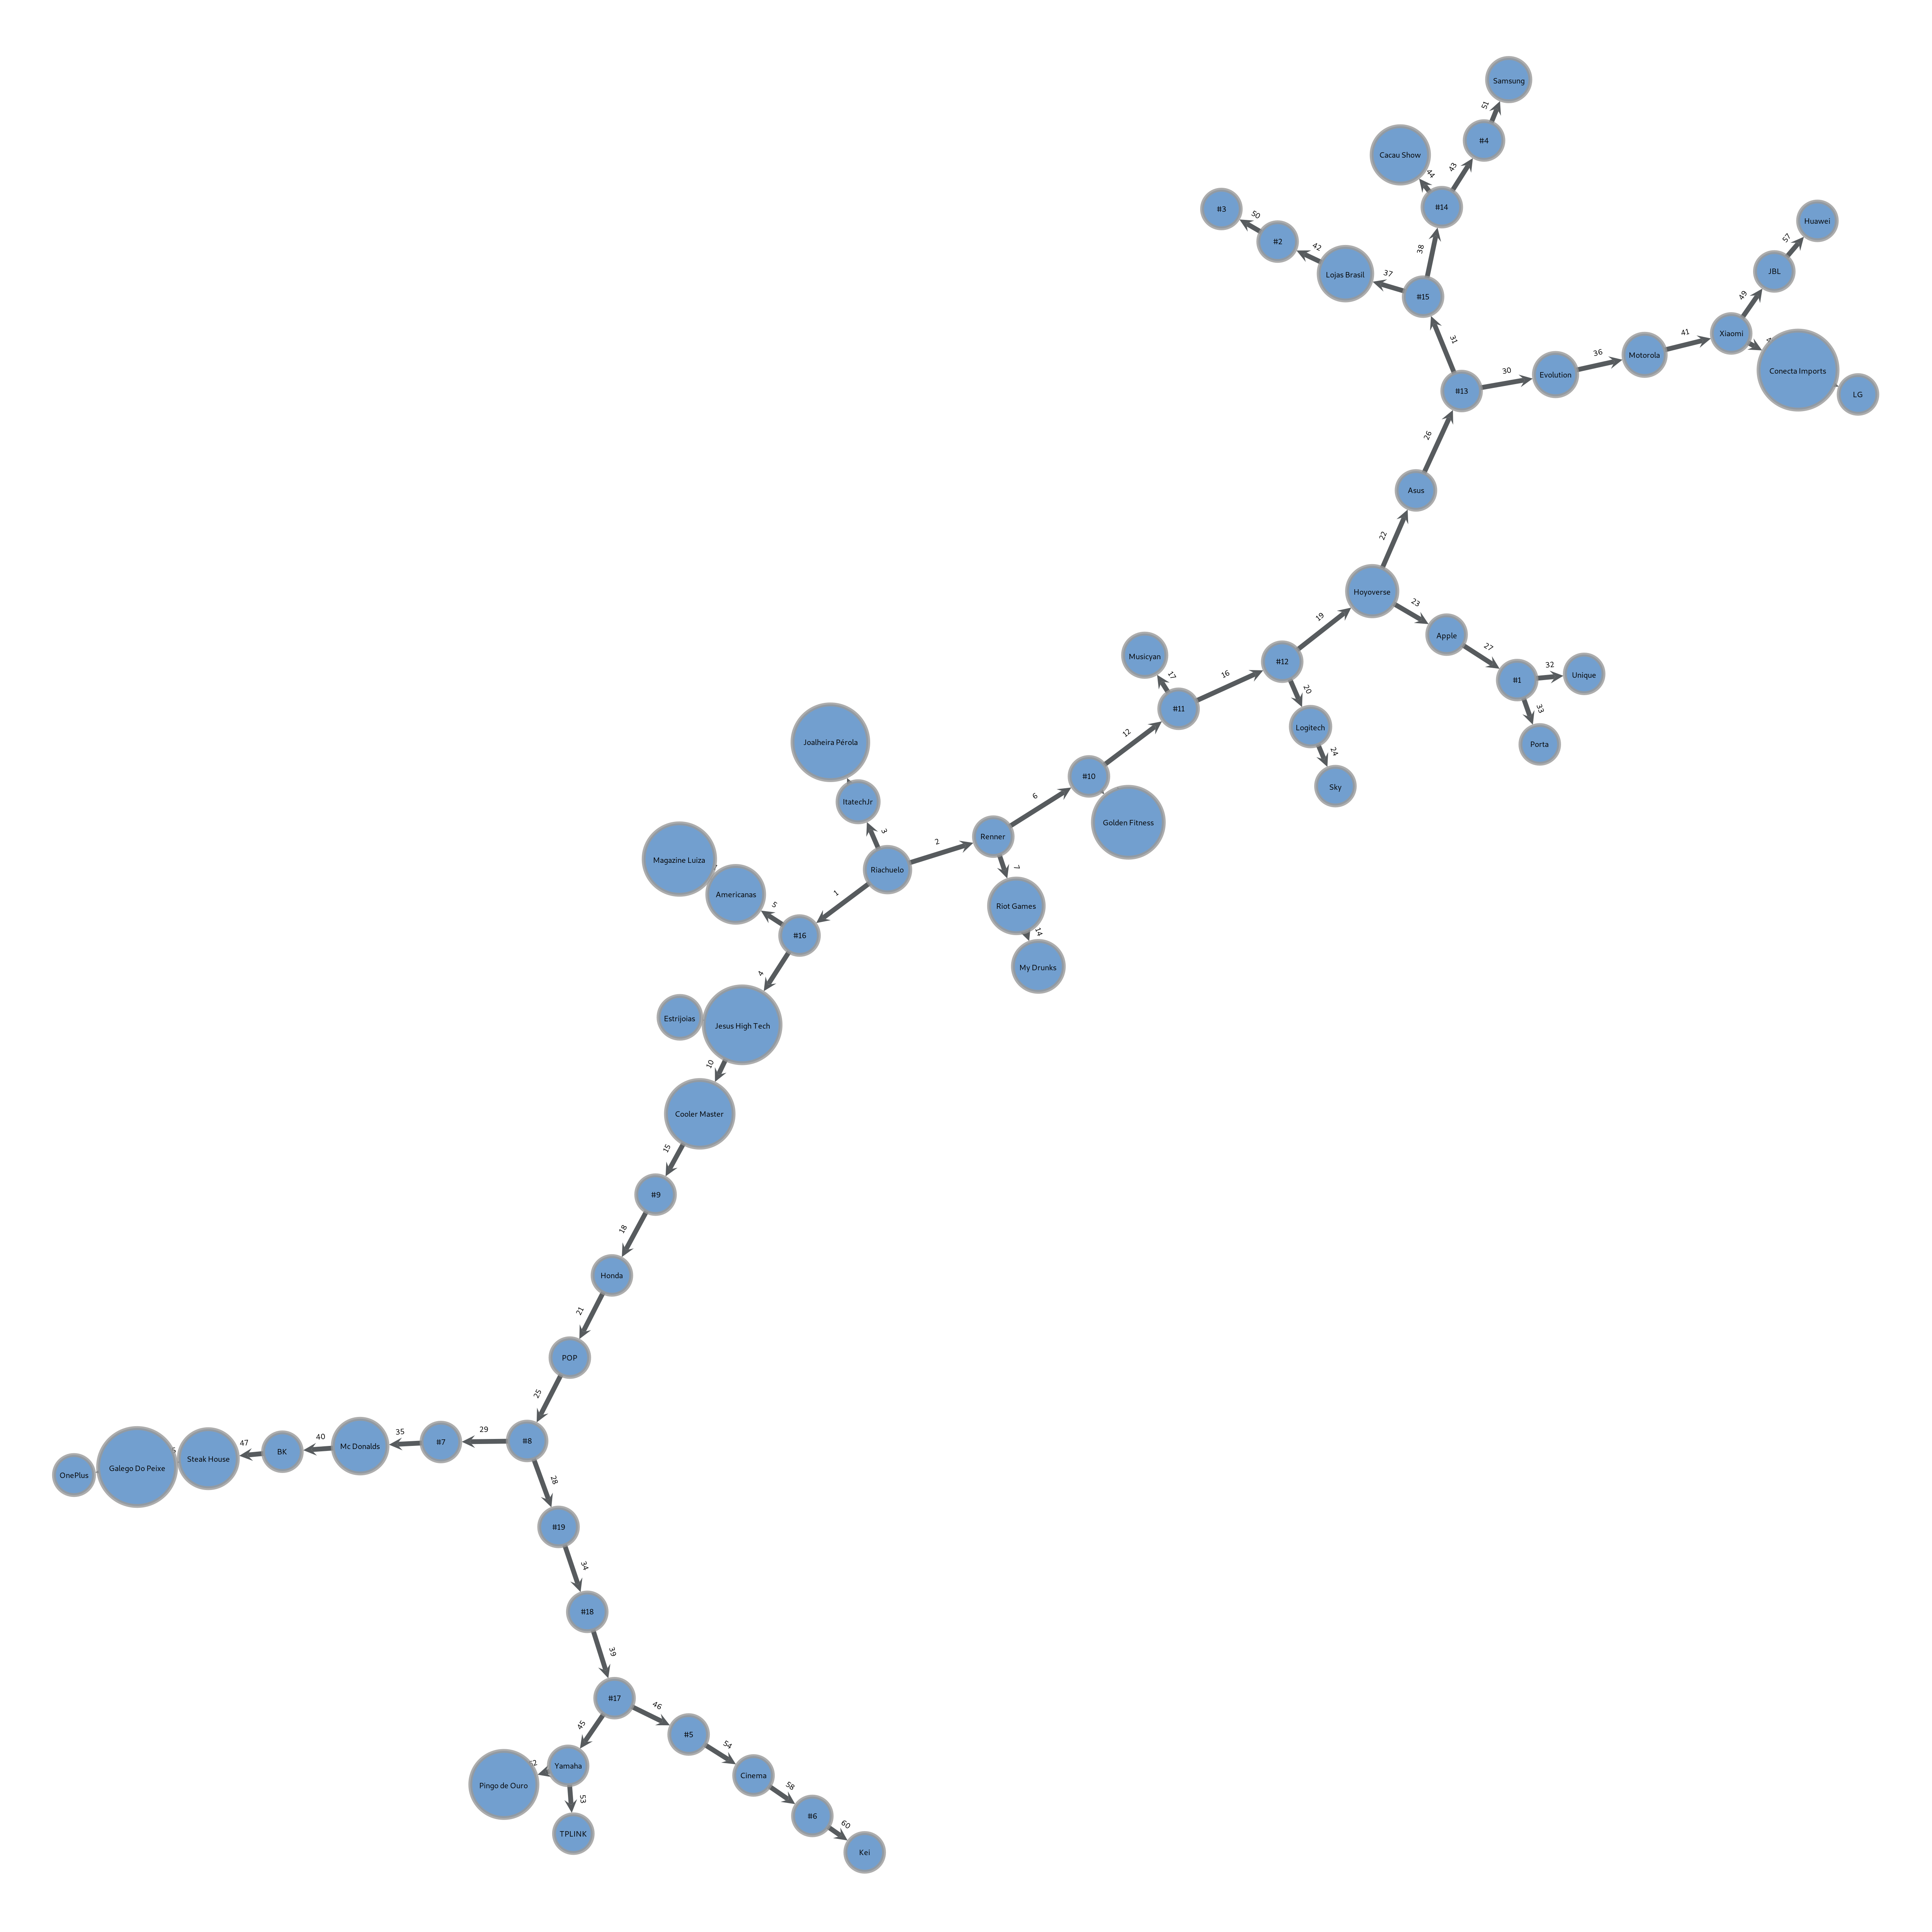

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fbeea027da0, at 0x7fbeac54a828>

In [75]:
import graph_tool.all as gt                           # Biblioteca para GRAFO
g_bfs = gt.Graph()                                    # criação do objeto para busca em Largura
v_name_bfs = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
e_ord = g_bfs.new_edge_property("int")                # referenciação da lista e_ord com uma nova propriedade criada para a ordem de expansão - tipo int

#Criação dos vértices no grafo à partir do arquivo .cvs de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for vertice in reader_network:
    v = g_bfs.add_vertex()
    v_name_bfs[v] = str(vertice[1])
f_network.close()

#Busca em Largura (dfs) e geração das arestas
ord = 1
for edge in gt.bfs_iterator(g, g.vertex(47)):
#    print(v_name[int(edge.source())], "->", v_name[int(edge.target())])
   e = g_bfs.add_edge(int(edge.source()), int(edge.target()))
#    print(vertice[1])
   e_ord[e] = ord
   ord += 1

#Desenhando o grafo
size = 5000
v_size = size / 50
e_pwidth = v_size / 8
gt.graph_draw(g_bfs,#pos=gt.sfdp_layout(g_bfs),
              vertex_size = v_size,
              vertex_text= v_name_bfs,
              edge_text= e_ord,
              vertex_font_size=20,
              edge_font_size = 20,
              edge_pen_width = e_pwidth,
              vertex_shape="circle",
              vertex_fill_color="#729fcf",
              output_size=(size, size))
              #output="two-nodes.png")           


In [76]:
class No_Raiz_Tree:         
      def __init__(self, key, source, treeDestiny):
            self.key = key
            self.source = source
            self.treeDestiny = treeDestiny
            self.left = None
            self.right = None
            self.height = 1
            
class No_Destino_Tree:
       def __init__(self, chave, destino, path):
            self.key = chave
            self.destiny = destino
            self.left = None
            self.right = None
            self.path = path
            self.height = 1
            
class AVL_Tree(object):
    #criar metodo init
    def __init__(self):
        self.root = None
        
    # Recursive function to insert key in
    # subtree rooted with node and returns
    # new root of subtree.
    def insert(self, root, key, source, treeDestiny):
     
        # Step 1 - Perform normal BST
        if not root:
            print("inserindo")
            return No_Raiz_Tree(key, source, treeDestiny)
        elif key < root.key:
            root.left = self.insert(root.left, key, source, treeDestiny)
        else:
            root.right = self.insert(root.right, key, source, treeDestiny)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < self.root.left.key:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > self.root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root

    def insertDestiny(self, root, key, destiny, path):
        if not root:
            return No_Destino_Tree(key, destiny, path)
        elif key < root.key:
            root.left = self.insert(root.left, key, destiny, path)
        else:
            root.right = self.insert(root.right, key, destiny, path)
 
        # Step 2 - Update the height of the
        # ancestor node
        root.height = 1 + max(self.getHeight(root.left),
                           self.getHeight(root.right))
 
        # Step 3 - Get the balance factor
        balance = self.getBalance(root)
 
        # Step 4 - If the node is unbalanced,
        # then try out the 4 cases
        # Case 1 - Left Left
        if balance > 1 and key < self.root.left.key:
            return self.rightRotate(root)
 
        # Case 2 - Right Right
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)
 
        # Case 3 - Left Right
        if balance > 1 and key > self.root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
 
        # Case 4 - Right Left
        if balance < -1 and key < root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)
 
        return root
        
 
    def leftRotate(self, z):
 
        y = z.right
        T2 = y.left
 
        # Perform rotation
        y.left = z
        z.right = T2
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                         self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                         self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def rightRotate(self, z):
 
        y = z.left
        T3 = y.right
 
        # Perform rotation
        y.right = z
        z.left = T3
 
        # Update heights
        z.height = 1 + max(self.getHeight(z.left),
                        self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                        self.getHeight(y.right))
 
        # Return the new root
        return y
 
    def getHeight(self, root):
        if not root:
            return 0
 
        return root.height
 
    def getBalance(self, root):
        if not root:
            return 0
 
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def preOrder(self, root):
 
        if not root:
            return
 
        print("{0} ".format(root.key), end="")
        self.preOrder(root.left)
        self.preOrder(root.right)
        
    
#------ Testes ------
#arvore = AVL_Tree()
#root = None
#root = arvore.insert(root, 1, "bk", "Americanas")
#root = arvore.insert(root, 2, "bk", "Americanas")
#root = arvore.insert(root, 3, "bk", "Americanas")

#root = arvore.insert(root, 4, "bk", "Americanas")
#root = arvore.insert(root, 5, "bk", "Americanas")
#root = arvore.insert(root, 6, "bk", "Americanas")
#arvore.preOrder(root)
 
 

**Busca em Largura - Busca e Apresentação do Caminho**

In [77]:
class VisitorExample(gt.BFSVisitor):                                            # É um objeto visitante que é chamado nos pontos de evento dentro do algoritmo bfs_search()

    def __init__(self, name, pred, dist, time, name_time, color, v_color):
        self.name = name
        self.pred = pred
        self.dist = dist
        self.time = time
        self.name_time = name_time
        self.last_time = 0
        self.color = color
        self.fill_color = v_color
        self.expanded_vertices = 0
        
    def discover_vertex(self, u):                                               # Invocado quando um vértice é encontrado pela primeira vez.
        self.name[u] = v_name[u]
        self.time[u] = self.last_time
        self.last_time += 1        
        self.name_time[u] = str(self.name[u]) + "(" + str(self.time[u]) + ")"
#         print("-->", self.name[u], "foi encontrado e entrou na FILA") 
        self.fill_color[u] = "white"
        self.expanded_vertices +=1

#     def examine_vertex(self, u):                                                # Invocado em um vértice à medida que é retirado da fila. 
#         print(self.name[u], "saiu da FILA e está sendo analisado (expandido)...") 

    def tree_edge(self, e):                                                     # Invocado em cada aresta à medida que se torna um 
        self.pred[e.target()] = int(e.source())                                 # membro das arestas que formam a árvore de pesquisa.
        self.dist[e.target()] = self.dist[e.source()] + 1  
        e = g_bfs.add_edge(int(e.source()), int(e.target()))
        self.color[e] = "gray"

#     def finish_vertex(self, u):
#         print("Todos os vértices adjacentes à", self.name[u], "foram descobertos!") 


In [78]:
#Busca em Largura (bfs) e geração das arestas
g_bfs = gt.Graph()                                      # criação do objeto para busca em Largura
v_name_bfs   = g_bfs.new_vertex_property("string")      # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string 
v_name_time  = g_bfs.new_vertex_property("string")      # referenciação da lista timed com uma nova propriedade da aresta criada para a ordem de expansão - tipo int
dist         = g_bfs.new_vertex_property("int")         # referenciação da lista dist como uma propriedade do vértice criada para a distância da raiz
pred         = g_bfs.new_vertex_property("int64_t")     # referenciação da lista pred como uma propriedade do vétice criada para referenciar o predecessor (pai)
time         = g_bfs.new_vertex_property("int")         # referenciação da lista timed com uma nova propriedade da aresta criada para a ordem de expansão - tipo int
color        = g_bfs.new_edge_property("string")        # referenciação da lista ecolor com uma nova propriedade criada para a aresta - tipo string  
v_color      = g_bfs.new_vertex_property("string")    # referenciação da lista ecolor com uma nova propriedade criada para o vértice - tipo string  


print("---------------------------------------------")
print("> Busca em Largura - Caminhamento pelos Estados")
print("---------------------------------------------\n")

#destino = "Yamaha"
index_raiz = 47

visitor = VisitorExample(v_name_bfs, pred, dist, time, v_name_time, color, v_color)
gt.bfs_search(g, g.vertex(index_raiz), visitor)   

index = 29  # Localizando o índice do Estado a ser encontrado
path = []                                # array do caminho
id_caminho = []
custo_Dist = 0.0

path.insert(0,v_name_bfs[index])  # inserções sendo realizadas no início
v_color[index] = "green"
id_caminho.insert(0, index)
while index != index_raiz:
    e = g_bfs.edge(index, pred[index])
    #color[e] = "red"
    index = pred[index]
    path.insert(0,v_name_bfs[index])
    id_caminho.insert(0, index)
    v_color[index] = "#729fcf"
    v_color[index_raiz] = "#729fcf"; 
   

for v in g.vertices():
    if v in id_caminho: #comparando se o id do vertice esta no caminho
            #bfsv_color[v] = "#729fcf" # pintando o vertice de azul 
            for edge in v.out_edges(): #retornar as arestas daquele vertice v
                if edge.target() in id_caminho: #target: retornar a arestar de destino daquele vertice
                    #bfse_color[edge] = "red"
                    custo_Dist += float(e_distance[edge])
        


print("Distancia pecorrida pelo caminho: " + str(custo_Dist/2))
print("Número de vértices expandidos: " + str(visitor.expanded_vertices))



---------------------------------------------
> Busca em Largura - Caminhamento pelos Estados
---------------------------------------------

Distancia pecorrida pelo caminho: 69.0
Número de vértices expandidos: 61


Caminho:
Americanas
Riachuelo
#16


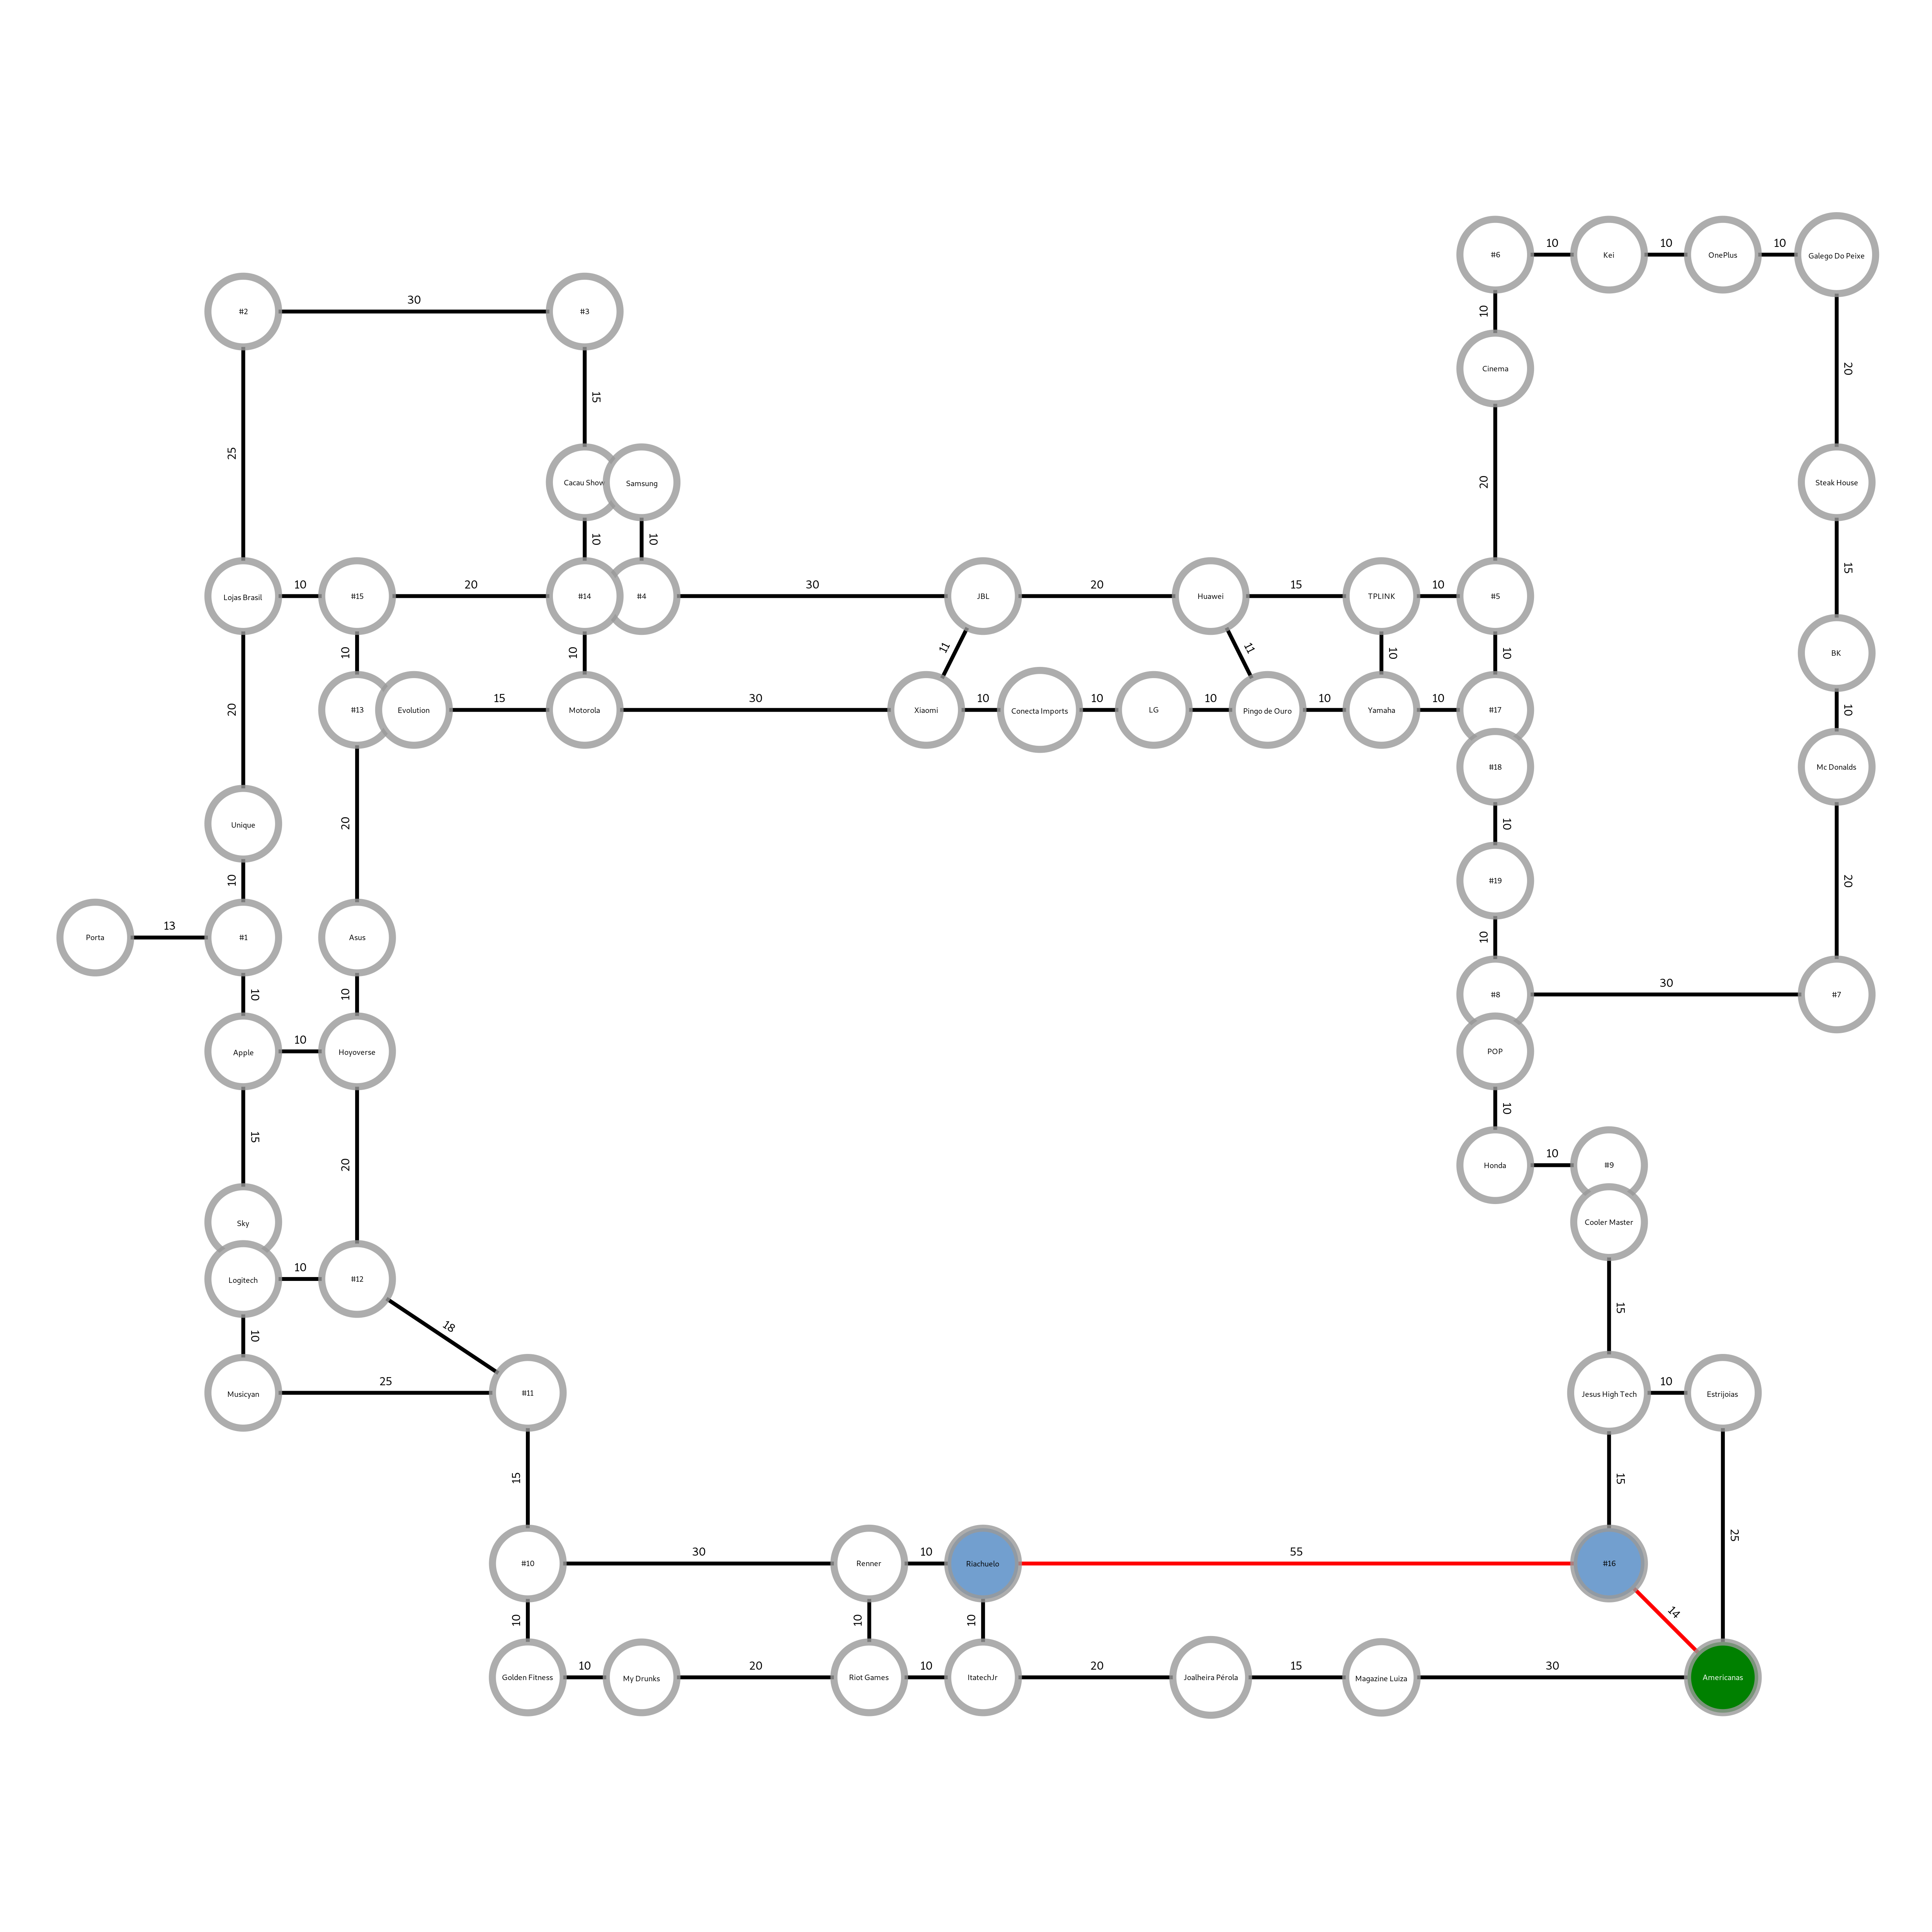

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fbeae489cc0, at 0x7fbeb13bf630>

In [79]:
import graph_tool.all as gt                       # Biblioteca para GRAFO
import csv                                        # Biblioteca para Leitura do csv
g = gt.Graph() 
g.set_directed(False)                             # criação do objeto
v_name = g.new_vertex_property("string")          # referenciação da lista v_name com uma nova propriedade (label) criada para o vértice - tipo string  
v_pos  = g.new_vertex_property("vector<double>")
e_distance = g.new_edge_property("string") 
e_weight = g.new_edge_property("float")  
e_action = g.new_edge_property("string") 
bfse_color = g.new_edge_property("string")  
bfsv_color = g.new_vertex_property("string") 

#Criação dos vértices no grafo à partir do arquivo .csv de vértices
f_network = open("vertices.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")

vposX = []
vposY = []
distancias = []
for vertice in reader_network:
    v = g.add_vertex()
    v_name[v] = str(vertice[1]) # Adicionando nome do vertice
    vposX.append(vertice[5]) # Adicionando posição X
    vposY.append(vertice[6]) # Adicionando posição Y
f_network.close()


#Criação das arestas no grafo à partir do arquivo .cvs de arestas
f_network = open("arestas.csv", 'r', encoding='utf-8')
reader_network = csv.reader(f_network, delimiter=",")
for edge in reader_network:
    e = g.add_edge(int(edge[0]), int(edge[1]))
    bfse_color[e] = "black"
    e_weight[e] = float(edge[2])
    e_distance[e] = str(edge[3])
   
f_network.close()


#Preenchendo as posições X e Y dos vértices
for v in g.vertices():
    v_pos[v] = (vposX[int(v)],vposY[int(v)])
#Pintando os vertices
for v in g.vertices():
    bfsv_color[v] = "white"
#Pintando as arestas
for e in g.edges():
    bfse_color[e] = "black"
    
#Pintando o caminho
destino = id_caminho[-1] #pegando o id do destino
print("Caminho:")
for v in g.vertices(): 
    if v in id_caminho: #comparando se o id do vertice esta no caminho
        bfsv_color[v] = "#729fcf" # pintando o vertice de azul
        if v == destino:
            bfsv_color[v] = "green"      
        print(v_name[v])
        for edge in v.out_edges(): #retornar as arestas daquele vertice v
            if edge.target() in id_caminho: #target: retornar a arestar de destino daquele vertice
                bfse_color[edge] = "red"
                

gt.graph_draw(g, pos=v_pos,
               vertex_text= v_name,
               edge_text = e_distance,
               edge_color= bfse_color,
               edge_pen_width = 10,  
               vertex_font_size=20,
               edge_font_size = 30,
               vertex_shape="circle",
               vertex_fill_color=bfsv_color,
               output_size=(5000,5000))
               #output="two-nodes.png")